In [1]:
import pandas as pd
import numpy as np

In [2]:
raw_csv_data = pd.read_csv("Stock_Indexes_2018.csv")

In [3]:
df_comp = raw_csv_data.copy()

In [4]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [5]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [6]:
df_comp.isna().sum()  # Check if there are any missing values

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

# Plotting the data

In [7]:
import matplotlib.pyplot as plt

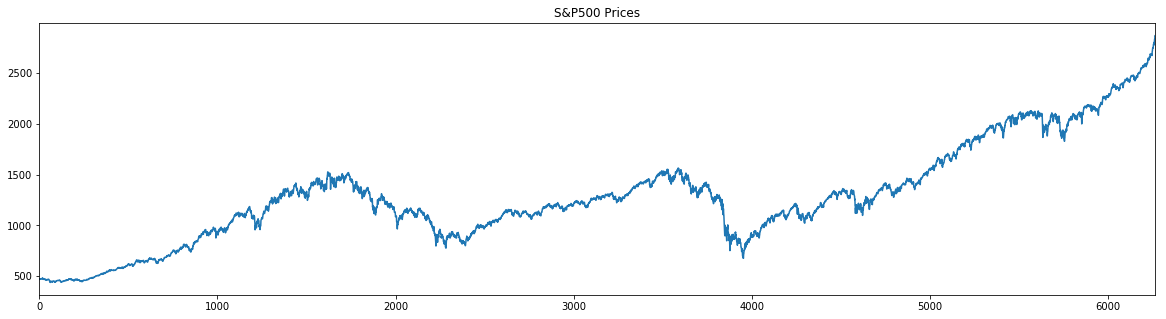

In [8]:
df_comp.spx.plot(figsize=(20,5), title='S&P500 Prices')  # S&P 500
plt.show()

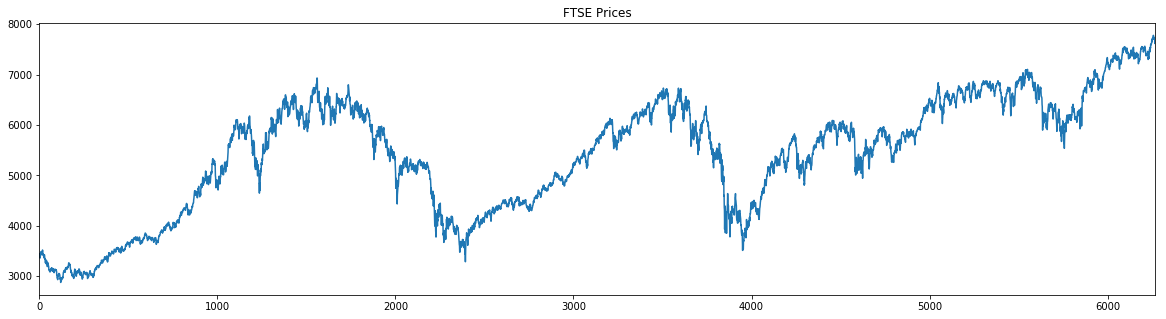

In [9]:
df_comp.ftse.plot(figsize=(20,5), title='FTSE Prices')
plt.show()

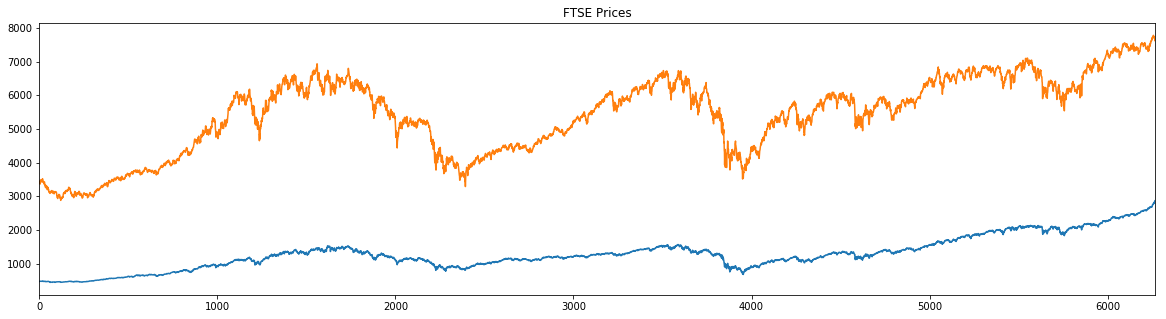

In [10]:
df_comp.spx.plot(figsize=(20,5), title='S&P500 Prices')
df_comp.ftse.plot(figsize=(20,5), title='FTSE Prices')
plt.show()  # Plotted together

# The QQ Plot

In [11]:
import scipy.stats
import pylab

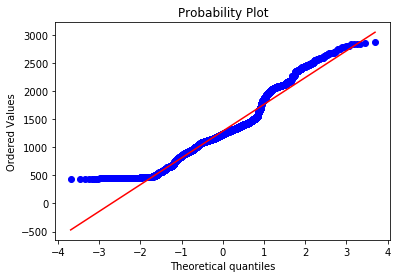

In [12]:
scipy.stats.probplot(df_comp.spx,plot=pylab)
pylab.show()

# From Text to Date

In [13]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)

In [14]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [15]:
df_comp.date.describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [16]:
df_comp.set_index("date", inplace=True)

In [17]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [18]:
df_comp = df_comp.asfreq('b')  # 'b' for business days, instead of 'd'

In [19]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [20]:
df_comp.isna().sum()  # Still have missing values

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [21]:
df_comp.spx = df_comp.spx.fillna(method='ffill')  # Fill with previous value
df_comp.ftse = df_comp.ftse.fillna(method='bfill')  # Fill with next value
df_comp.dax = df_comp.dax.fillna(value=df_comp.dax.mean())  # Fill with average value
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [22]:
df_comp.nikkei = df_comp.nikkei.fillna(value=df_comp.nikkei.mode())  # Fill with most-frequent value 

# Simplifying the Dataset

In [23]:
df_comp['market_value'] = df_comp.spx  # Only consider the S&P 500
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6269.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.055700,1288.642547
std,487.868210,2752.604984,1145.568370,4043.122953,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10709.290000,992.715221
50%,1233.761241,5774.380000,5663.300000,15028.170000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17860.470000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [24]:
del df_comp['spx']

In [25]:
del df_comp['dax'], df_comp['ftse'], df_comp['nikkei']
df_comp.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


# Splitting the data

In [26]:
size = int(len(df_comp)*0.8)

In [27]:
df = df_comp.iloc[:size]

In [28]:
df_test = df_comp.iloc[size:]

In [29]:
df.tail()  # Check split

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [30]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


# White Noise

In [31]:
wn = np.random.normal(loc=df.market_value.mean(), scale=df.market_value.std(), size=len(df))

In [32]:
df['wn'] = wn

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1094.169459
std,292.559287,302.408436
min,438.920000,-9.268687
25%,914.620000,894.108138
50%,1144.650000,1096.388969
75%,1316.280729,1289.203785
max,1570.252238,2382.507578


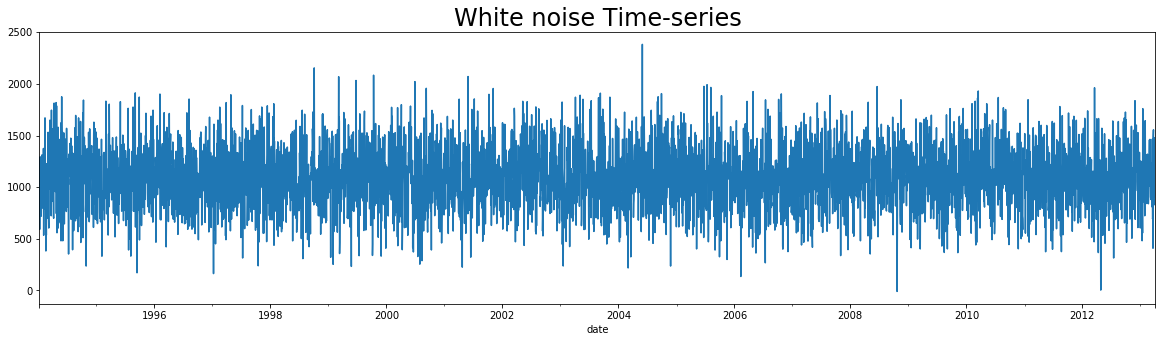

In [34]:
df.wn.plot(figsize=(20,5))
plt.title("White noise Time-series", size=24)
plt.show()

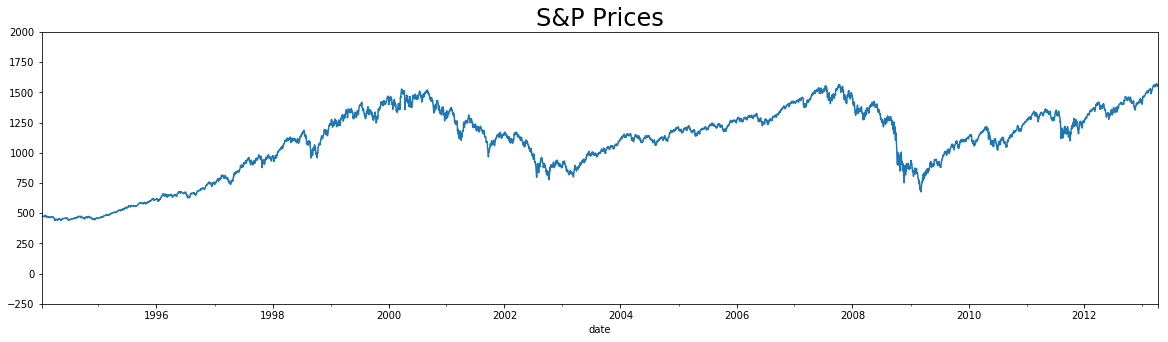

In [35]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size=24)
plt.ylim(-250, 2000)
plt.show()

# Random Walk

In [36]:
rw = pd.read_csv('RandWalk.csv')
rw.date = pd.to_datetime(rw.date, dayfirst=True)
rw.set_index('date', inplace=True)
rw = rw.asfreq('b')

In [37]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [38]:
df['rw'] = rw.price

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1265.218245,1122.139662
1994-01-10,475.27,591.500766,1080.347860
1994-01-11,474.13,943.377030,1082.095245
1994-01-12,474.17,1293.779685,1083.639265
1994-01-13,472.47,1202.262676,1067.146255


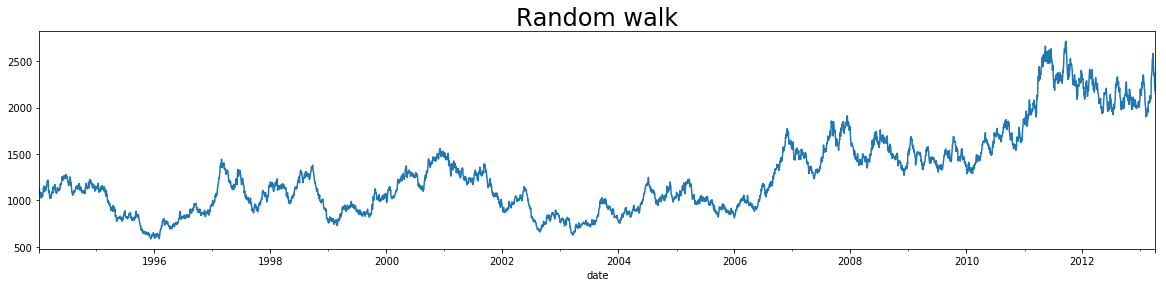

In [40]:
df.rw.plot(figsize=(20,4))
plt.title('Random walk', size=24)
plt.show()

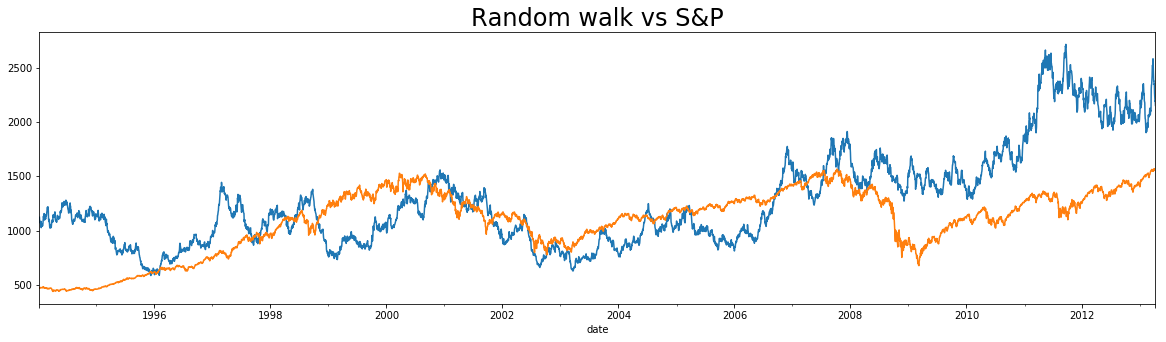

In [41]:
df.rw.plot(figsize=(20,5))
df.market_value.plot()
plt.title('Random walk vs S&P', size=24)
plt.show()

# Stationarity

In [42]:
import statsmodels.tsa.stattools as sts

In [43]:
sts.adfuller(df.market_value)  # S&P data

(-1.7369847452352427,
 0.4121645696770626,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [44]:
sts.adfuller(df.wn)  # white noise  

(-39.643453059180146,
 0.0,
 2,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 71140.73653828278)

In [45]:
sts.adfuller(df.rw)  # random walk

(-1.3286073927689723,
 0.6159849181617383,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

# Seasonality

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

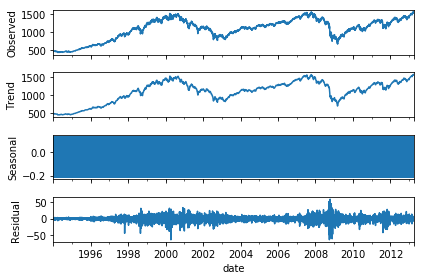

In [47]:
s_dec_additive = seasonal_decompose(df.market_value, model='additive')
s_dec_additive.plot()
plt.show()

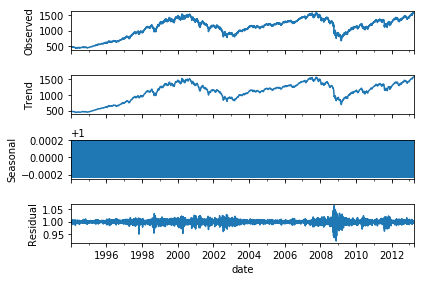

In [48]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model='multiplicative')
s_dec_multiplicative.plot()
plt.show()

No seasonal influence is evident when using either naive model.

# Autocorrelation Function

In [49]:
import statsmodels.graphics.tsaplots as sgt

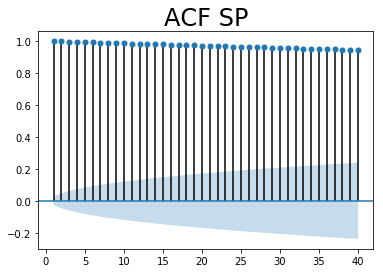

In [50]:
sgt.plot_acf(df.market_value, lags=40, zero=False)
plt.title('ACF SP', size=24)
plt.show()

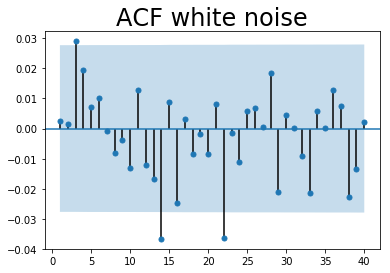

In [51]:
sgt.plot_acf(df.wn, lags=40, zero=False)
plt.title('ACF white noise', size=24)
plt.show()

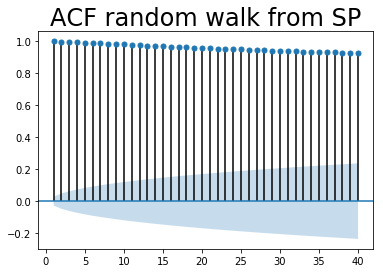

In [52]:
sgt.plot_acf(df.rw, lags=40, zero=False)
plt.title('ACF random walk from SP', size=24)
plt.show()

# Partial Autocorrelation Function

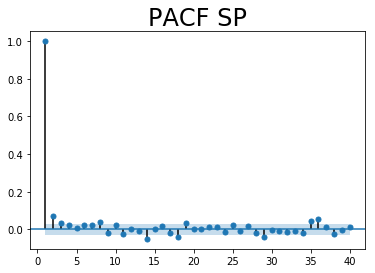

In [53]:
sgt.plot_pacf(df.market_value, lags=40, zero=False, method=('ols'))  # order of least squares
plt.title('PACF SP', size=24)
plt.show()

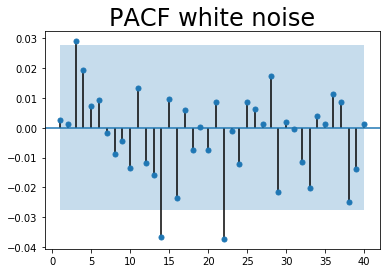

In [54]:
sgt.plot_pacf(df.wn, lags=40, zero=False, method=('ols'))  # order of least squares
plt.title('PACF white noise', size=24)
plt.show()

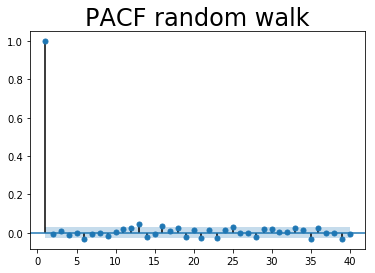

In [55]:
sgt.plot_pacf(df.rw, lags=40, zero=False, method=('ols'))  # order of least squares
plt.title('PACF random walk', size=24)
plt.show()